<a href="https://colab.research.google.com/github/chanyoung1998/LearningML-DL/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#로지스틱 회귀(4-1단원)





In [ ]:
import pandas as pd
import numpy as np

fish =  pd.read_csv('https://bit.ly/fish_csv')
fish.head()

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(fish_input,fish_target,random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))


0.8907563025210085
0.85


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))




proba = lr.predict_proba(test_scaled[:5])
print(lr.classes_)
print(np.round(proba,decimals=3))
print('predict:',lr.predict(test_scaled[:5]))
print('anser:',*test_target[:5])

0.9327731092436975
0.925
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
predict: ['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
anser: ['Perch'] ['Smelt'] ['Pike'] ['Whitefish'] ['Perch']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##로지스틱 회귀로 와인 분류하기(05-1단원)

In [4]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2,random_state = 42)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


In [16]:
print(lr.coef_,lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


#결정 트리(5-1단원)


In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.996921300750433
0.86


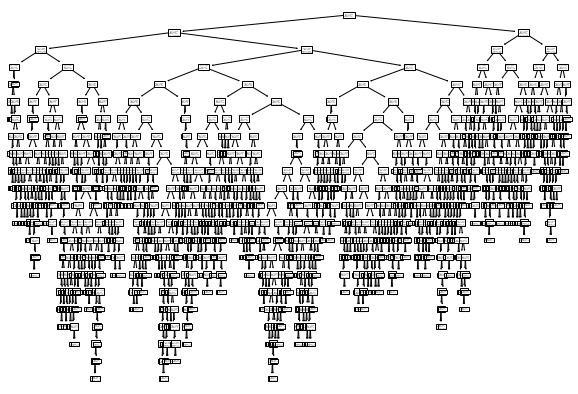

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()

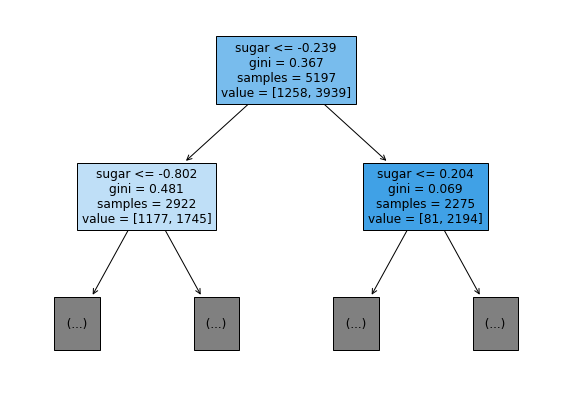

In [22]:
plt.figure(figsize = (10,7))
plot_tree(dt,max_depth = 1, filled = True, feature_names = ['alchol','sugar','pH'])
plt.show()

In [23]:
dt = DecisionTreeClassifier(max_depth= 3 ,random_state= 42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8454877814123533
0.8415384615384616


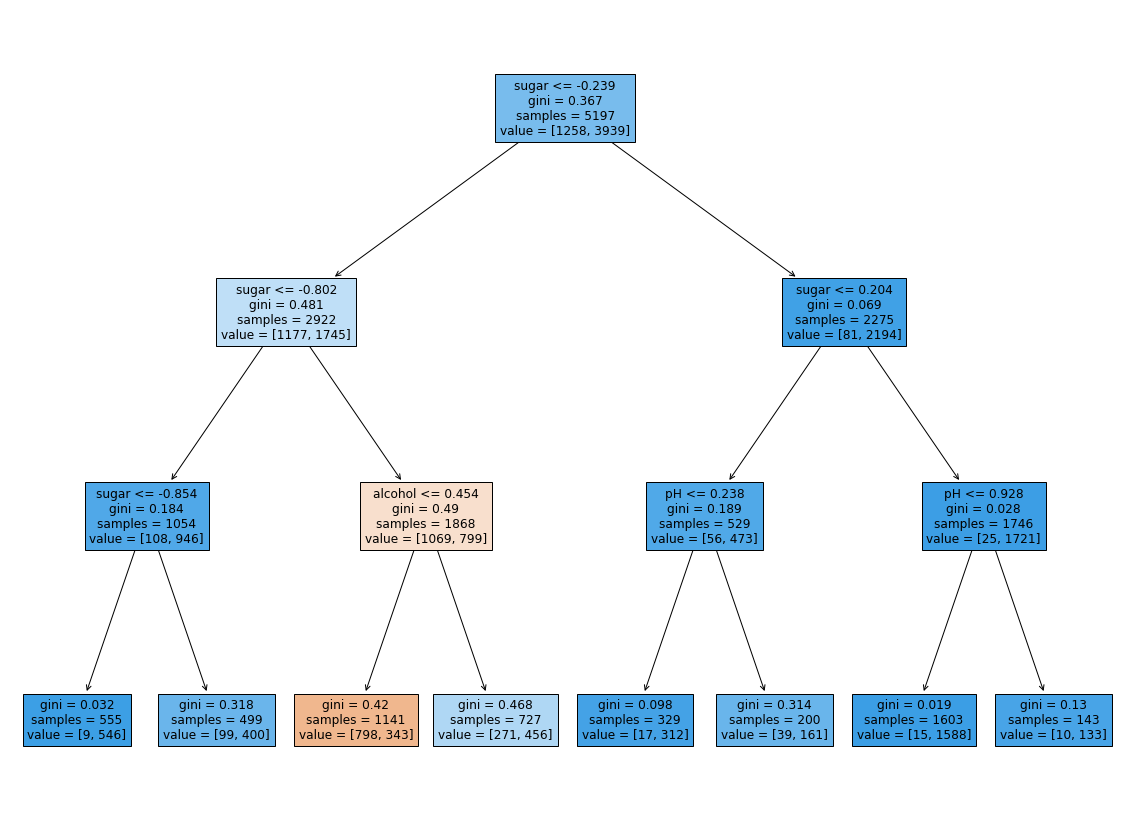

In [24]:
plt.figure(figsize = (20,15))
plot_tree(dt,filled= True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [25]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
